In [1]:
# importing required libraries
import pandas as pd
import numpy as np


In [2]:
# importing csv data into a dataframe
data = pd.read_csv('Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
#the dictionary represents definitions of each variable
with open('Data Dictionary.txt') as text_file:
    dictionary = text_file.read()
print(dictionary)

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

# Data Cleaning  
1. Handling missing data  
2. Handling inconsistant data  
3. Handling outliers

## Missing data

In [4]:
# checking for missing values in the data
data.isnull().values.any()
# if True then there are missing values and if false there are no missing values

False

the result is false so there are no missinng values in the dataset

## Inconsistant data

### 1. Consistancy of datatypes of variables

In [5]:
# checking data type consistensy in each column of data i.e. each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


so the variables step, amount, oldbalanceOrig, newbalanceOrig, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud have consistant data types which is int64 or float64

now we need to check for the datatypes object in variables type, nameOrig, nameDest have consists of same dtype

In [6]:
# checking if variable 'type' has any other object type other than 'str'
(data['type'].map(type) != str).values.any()
# if returned true there are 'type' variable consists object types other than 'str'

False

In [7]:
# checking if variable 'nameOrig' has any other object type other than 'str'
(data['nameOrig'].map(type) != str).values.any()
# if returned true there are 'type' variable consists object types other than 'str'

False

In [8]:
# checking if variable 'nameDest' has any other object type other than 'str'
(data['nameDest'].map(type) != str).values.any()
# if returned true there are 'nameDest' variable consists object types other than 'str'

False

so the dtypes are consistant across the variables 'type', 'nameOrig', 'nameDest'

### 2. Duplicate data

In [9]:
# finding dupicate data and getting total number of duplicated data
data.duplicated().sum()
# returns number of duplicate data

0

so there is no duplication in the data

### 3. validity  
is the data consistant with the rules.

Possible rules that apply here are related to transaction numbers like amount, orig balances and dest balances. The rule also depend on the type of transaction

In [10]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

there same errors in newbalanceOrig and newbalanceDest, so for correcting this validity error we add extra 2 features errorbalanceOrig and errorbalanceDest  
   
errorbalanceOrig = (newbalanceOrig + amount) - oldbalanceOrig  
errorbalanceDest = (newbalanceDest + amount) - oldbalanceDest

In [11]:
data['errorbalanceOrig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['errorbalanceDest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

# Data Analysis and Visualization

In [12]:
# importing libs/modules required for plotting
import matplotlib.pyplot as plt

In [13]:
# getting the number of fraud examples and number of not fraud examples
n_fraud  = data['isFraud'].value_counts()
n_fraud

0    6354407
1       8213
Name: isFraud, dtype: int64

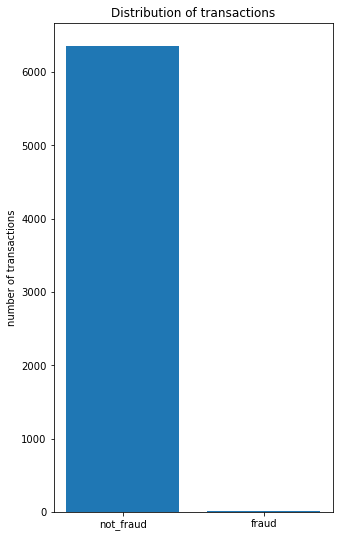

In [14]:
# bar plot of count of fraud vs not fraud in thousands
nf_plot = plt.figure(figsize=(5,9))
plt.bar(['not_fraud','fraud'],n_fraud.values/1000)
plt.title('Distribution of transactions')
plt.ylabel('number of transactions')
plt.show()

ths shows that the data is highly imbalanced as the number of not_fraud examples are very very large when compared to number fraud examples. thus we must use  resampling techniques to balance the data

In [15]:
# getting count of transaction types in fraud data
t_fraud_s = data[data['isFraud'] == 1]['type'].value_counts()
t_fraud_s
# returns transaction type and number fraud examples for each type

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [16]:
t_fraud = []
for t in ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT' ]:
    try:
        t_fraud.append(t_fraud_s[t])
    except:
        t_fraud.append(0)


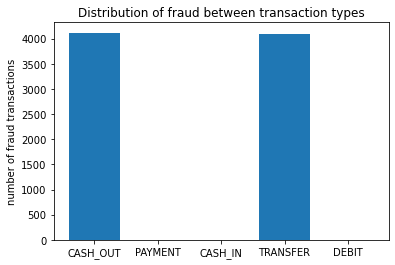

In [17]:
tf_plot = plt.figure()
plt.bar(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT' ],t_fraud)
plt.title('Distribution of fraud between transaction types')
plt.ylabel('number of fraud transactions')
plt.show()

the fraud examples are  equally distributed betwenn the types 'CASH_OUT', 'TRANSFER' but other transaction types do not contain any fraudulent transactions. this show that fraudulent transactions are only occuring within transaction types CASH_OUT and TRANSFER.

this conveys that transaction types other than 'CASH_OUT', 'TRANSFER' have no relevence to fraud transactions, so examples with these types can be removed before training data. the algorithm if would if transaction type not 'CASH_OUT', 'TRANSFER' not fraudulent transaction else run the data into machine learning model to predict wether the transaction is fraud or not 

In [18]:
# count of each payment type
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

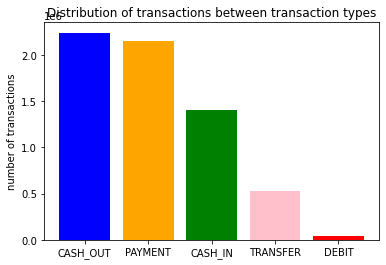

In [19]:
# plot of transaction type distribution
plot = plt.figure()
plt.bar(data['type'].value_counts().index,data['type'].value_counts().values, color = ['blue','orange','green','pink','red'])
plt.title('Distribution of transactions between transaction types')
plt.ylabel('number of transactions')
plt.show()

this shows that cash out is the most used transaction type and debit being least used trasaction type.

expected no. of fraud per 10000 transactions for individual type =  
               total no. of frauds in indivitual transaction type / total no. of transactions of individual type

In [20]:
# calculating occurence of fraud per 1000 transactions
(t_fraud_s/data['type'].value_counts()[['CASH_OUT','TRANSFER']])*1000

CASH_OUT    1.839553
TRANSFER    7.687992
Name: type, dtype: float64

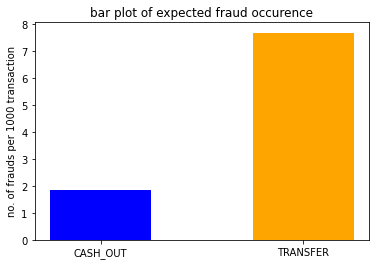

In [21]:
tf_plot = plt.figure()
plt.bar((t_fraud_s/data['type'].value_counts()[['CASH_OUT','TRANSFER']]).index,(t_fraud_s/data['type'].value_counts()[['CASH_OUT','TRANSFER']]).values*1000, color = ['blue','orange'], width = 0.5)
plt.title('bar plot of expected fraud occurence')
plt.ylabel('no. of frauds per 1000 transaction')
plt.show()

In [22]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrig,errorbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,8.500025e+05


## data preparation for model training



In [23]:
model_data = data[(data['type'] == 'CASH_OUT') | (data['type'] == 'TRANSFER')]
model_data = model_data.drop(['nameOrig','nameDest'],axis = 1)
model_data['type'].replace('TRANSFER', 0, inplace = True)
model_data['type'].replace('CASH_OUT', 1, inplace = True)

In [24]:
model_y = model_data['isFraud']
model_x = model_data.drop(['isFraud'],axis = 1)

In [25]:
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

### resampling of data using SMOTE

In [26]:
x_resample, y_resample = SMOTE().fit_resample(model_x, model_y.values.ravel())

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.1, random_state = 0)

In [28]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## model selection and training

### logistic regresion

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [31]:
# metrics
print('accuracy : {}'.format(model.score(x_test,y_test)))
print('average precision score : {}'.format(average_precision_score(y_test,y_pred)))
print('confusion matrix :\n  {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report :')
print(classification_report(y_test,y_pred))


accuracy : 0.9466186373180798
average precision score : 0.9230131636088915
confusion matrix :
  [[262587  14390]
 [ 15100 260363]]
classification report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    276977
           1       0.95      0.95      0.95    275463

    accuracy                           0.95    552440
   macro avg       0.95      0.95      0.95    552440
weighted avg       0.95      0.95      0.95    552440



### Support vector machine classifier

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
# metrics
print('accuracy : {}'.format(model.score(x_test,y_test)))
print('average precision score : {}'.format(average_precision_score(y_test,y_pred)))
print('confusion matrix :\n  {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report :')
print(classification_report(y_test,y_pred))

### MLPClassifier (neural networks)

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier([100,150,100])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)   